<a href="https://colab.research.google.com/github/siralisalari/Brain_Cancer_Detection/blob/main/Brain_Cancer_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')
#https://drive.google.com/file/d/1I2qdWtlI-Gee4sPxEnozjO8IYwibnBIp/view?usp=sharing

Mounted at /content/drive


In [2]:
!gdown 1I2qdWtlI-Gee4sPxEnozjO8IYwibnBIp

Downloading...
From (original): https://drive.google.com/uc?id=1I2qdWtlI-Gee4sPxEnozjO8IYwibnBIp
From (redirected): https://drive.google.com/uc?id=1I2qdWtlI-Gee4sPxEnozjO8IYwibnBIp&confirm=t&uuid=60611458-ca2e-43b1-9b8f-8124f2f93c3b
To: /content/BraintumorHT.zip
100% 112M/112M [00:01<00:00, 67.5MB/s] 


In [3]:
!unzip BraintumorHT.zip

Archive:  BraintumorHT.zip
  inflating: Brain Tumor Data Set/Brain Tumor Data Set/Brain Tumor/Cancer (1).jpg  
  inflating: Brain Tumor Data Set/Brain Tumor Data Set/Brain Tumor/Cancer (1).png  
  inflating: Brain Tumor Data Set/Brain Tumor Data Set/Brain Tumor/Cancer (1).tif  
  inflating: Brain Tumor Data Set/Brain Tumor Data Set/Brain Tumor/Cancer (10).jpg  
  inflating: Brain Tumor Data Set/Brain Tumor Data Set/Brain Tumor/Cancer (10).tif  
  inflating: Brain Tumor Data Set/Brain Tumor Data Set/Brain Tumor/Cancer (100).jpg  
  inflating: Brain Tumor Data Set/Brain Tumor Data Set/Brain Tumor/Cancer (1000).jpg  
  inflating: Brain Tumor Data Set/Brain Tumor Data Set/Brain Tumor/Cancer (1001).jpg  
  inflating: Brain Tumor Data Set/Brain Tumor Data Set/Brain Tumor/Cancer (1002).JPG  
  inflating: Brain Tumor Data Set/Brain Tumor Data Set/Brain Tumor/Cancer (1003).jpg  
  inflating: Brain Tumor Data Set/Brain Tumor Data Set/Brain Tumor/Cancer (1004).jpg  
  inflating: Brain Tumor Data 

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import os
import math
import shutil
import glob
import warnings
warnings.filterwarnings('ignore')

In [5]:
Root_Dir = "/content/Brain Tumor Data Set/Brain Tumor Data Set"
number_of_images = {}

for dir in os.listdir(Root_Dir):
  number_of_images[dir] = len(os.listdir(os.path.join(Root_Dir, dir)))

number_of_images.items()

dict_items([('Healthy', 2087), ('Brain Tumor', 2513)])

In [6]:
len(os.listdir("/content/Brain Tumor Data Set/Brain Tumor Data Set"))

2

In [7]:
def DataFolder (p, split):
  if not os.path.exists("./" + p):
    os.mkdir("./" + p)

  for dir in os.listdir(Root_Dir):
    os.makedirs(".//"+ p + "/" +dir)

    for img in np.random.choice(a = os.listdir(os.path.join(Root_Dir, dir)),
                                size = (math.floor(split * number_of_images[dir])-5),
                                replace=False):
      O = os.path.join(Root_Dir, dir, img)
      D = os.path.join("./" + p, dir)
      shutil.copy(O, D)
      os.remove(O)
    else:
      print(f"{p}the folder exist")

In [8]:
DataFolder("train", 0.7)

trainthe folder exist
trainthe folder exist


In [9]:
DataFolder("val", 0.15)

valthe folder exist
valthe folder exist


In [10]:
DataFolder("test", 0.15)

testthe folder exist
testthe folder exist


In [11]:
from keras.layers import Conv2D, MaxPool2D, Dropout, Flatten, Dense, BatchNormalization, GlobalMaxPooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import keras
import tensorflow as tf

In [12]:
model = keras.Sequential()
model.add(Conv2D(filters=16, kernel_size=(3,3), activation='relu', input_shape = (224, 224, 3)))

model.add(Conv2D(filters=36, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Dropout(rate=0.25))

model.add(Flatten())
model.add(Dense(units=64, activation='relu'))
model.add(Dropout(rate=0.25))
model.add(Dense(units=1, activation='sigmoid'))

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 220, 220, 36)   │         5,220 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 110, 110, 36)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 108, 108, 64)   │        20,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │     5,537,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,638,245 (21.51 MB)

 Trainable params: 5,638,245 (21.51 MB)

 Non-trainable params: 0 (0.00 B)

In [13]:
model.compile(optimizer='adam', loss = keras.losses.binary_crossentropy, metrics=['accuracy'])

In [14]:
from keras.applications.mobilenet import preprocess_input

In [15]:
def PreprocessingImages1(path):
  image_data = ImageDataGenerator(zoom_range=0.2, shear_range=0.2, preprocessing_function= preprocess_input, horizontal_flip = True)
  image = image_data.flow_from_directory(directory = path, target_size = (224, 224), batch_size = 32, class_mode ='binary')

  return image

In [16]:
path = "/content/train"
train_data = PreprocessingImages1(path)

Found 3209 images belonging to 2 classes.


In [17]:
def PreprocessingImages2(path):
  image_data = ImageDataGenerator(preprocessing_function= preprocess_input)
  image = image_data.flow_from_directory(directory = path, target_size = (224, 224), batch_size = 32, class_mode ='binary')

  return image

In [18]:
path = "/content/test"
test_data = PreprocessingImages2(path)

Found 679 images belonging to 2 classes.


In [19]:
path = "/content/val"
val_data = PreprocessingImages2(path)

Found 679 images belonging to 2 classes.


In [20]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

# EarlyStopping
es = EarlyStopping(monitor = "val_accuracy", min_delta = 0.01, patience = 6, verbose = 1, mode = 'auto')

# ModelCheckpoint
mc = ModelCheckpoint(monitor = "val_accuracy", filepath = "./bestmodel.h5", verbose = 1, save_best_only = True, mode = 'auto')

cd = [es, mc]

# Model training

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Flatten, Dense
from keras.models import Model, load_model
from keras.applications.mobilenet import MobileNet
import keras

In [22]:
base_model = MobileNet(input_shape =(224, 224, 3), include_top=False)

17225924/17225924 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [23]:
for layer in base_model.layers:
  layer.trainable = False

In [24]:
base_model.summary()

Model: "mobilenet_1.00_224"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1 (Conv2D)                  │ (None, 112, 112, 32)   │           864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1_bn (BatchNormalization)   │ (None, 112, 112, 32)   │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1_relu (ReLU)               │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1 (DepthwiseConv2D)     │ (None, 112, 112, 32)   │           288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1_bn                    │ (None, 112, 112, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1_relu (ReLU)           │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1 (Conv2D)              │ (None, 112, 112, 64)   │         2,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1_bn                    │ (None, 112, 112, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1_relu (ReLU)           │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pad_2 (ZeroPadding2D)      │ (None, 113, 113, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2 (DepthwiseConv2D)     │ (None, 56, 56, 64)     │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2_bn                    │ (None, 56, 56, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2_relu (ReLU)           │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2 (Conv2D)              │ (None, 56, 56, 128)    │         8,192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2_bn                    │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2_relu (ReLU)           │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3 (DepthwiseConv2D)     │ (None, 56, 56, 128)    │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3_bn                    │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3_relu (ReLU)           │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_3 (Conv2D)              │ (None, 56, 56, 128)    │        16,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_3_bn                    │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │             

 Total params: 3,228,864 (12.32 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 3,228,864 (12.32 MB)

In [25]:
X = Flatten()(base_model.output)
X = Dense(units=1, activation='sigmoid')(X)

model = Model(base_model.input, X)

In [26]:
model.summary()

Model: "functional_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1 (Conv2D)                  │ (None, 112, 112, 32)   │           864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1_bn (BatchNormalization)   │ (None, 112, 112, 32)   │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1_relu (ReLU)               │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1 (DepthwiseConv2D)     │ (None, 112, 112, 32)   │           288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1_bn                    │ (None, 112, 112, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1_relu (ReLU)           │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1 (Conv2D)              │ (None, 112, 112, 64)   │         2,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1_bn                    │ (None, 112, 112, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1_relu (ReLU)           │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pad_2 (ZeroPadding2D)      │ (None, 113, 113, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2 (DepthwiseConv2D)     │ (None, 56, 56, 64)     │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2_bn                    │ (None, 56, 56, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2_relu (ReLU)           │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2 (Conv2D)              │ (None, 56, 56, 128)    │         8,192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2_bn                    │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2_relu (ReLU)           │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3 (DepthwiseConv2D)     │ (None, 56, 56, 128)    │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3_bn                    │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3_relu (ReLU)           │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_3 (Conv2D)              │ (None, 56, 56, 128)    │        16,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_3_bn                    │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │             

 Total params: 3,279,041 (12.51 MB)

 Trainable params: 50,177 (196.00 KB)

 Non-trainable params: 3,228,864 (12.32 MB)

In [27]:
model.compile(optimizer='rmsprop', loss = keras.losses.binary_crossentropy, metrics =['accuracy'])

In [33]:
from keras.callbacks import ModelCheckpoint

cb = [
    ModelCheckpoint('bestmodel.h5', monitor='val_accuracy', save_best_only=True)
]
from keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_accuracy', patience=6, restore_best_weights=True)
cb = [early_stop, ModelCheckpoint('bestmodel.keras', monitor='val_accuracy', save_best_only=True)]


In [34]:
hist = model.fit(train_data, steps_per_epoch=10, epochs=100, validation_data=val_data, validation_steps=16, callbacks=cb)

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 551ms/step - accuracy: 0.9550 - loss: 0.3415 - val_accuracy: 0.9219 - val_loss: 0.9223
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 562ms/step - accuracy: 0.9655 - loss: 0.3270 - val_accuracy: 0.9707 - val_loss: 0.2607
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 594ms/step - accuracy: 0.9941 - loss: 0.0486 - val_accuracy: 0.9453 - val_loss: 0.5081
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 6s 625ms/step - accuracy: 0.8661 - loss: 1.5708 - val_accuracy: 0.9727 - val_loss: 0.2699
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 560ms/step - accuracy: 0.9399 - loss: 0.4268 - val_accuracy: 0.9707 - val_loss: 0.3070
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 9s 956ms/step - accuracy: 0.9949 - loss: 0.0107 - val_accuracy: 0.9688 - val_loss: 0.2488
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 292ms/step - accuracy: 0.8647 - loss: 1.8309 - val_accuracy: 0.9609 - val_loss: 0.4074
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 603ms/step - accuracy: 0.9844 - loss: 0.1795 - val_accu

In [36]:
model = load_model("/content/bestmodel.keras")

In [37]:
acc = model.evaluate(test_data)[1]
print(f" our model accuracy is {acc * 100} %")

22/22 ━━━━━━━━━━━━━━━━━━━━ 6s 168ms/step - accuracy: 0.9793 - loss: 0.1463
 our model accuracy is 98.08542132377625 %


In [38]:
h = hist.history
h.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

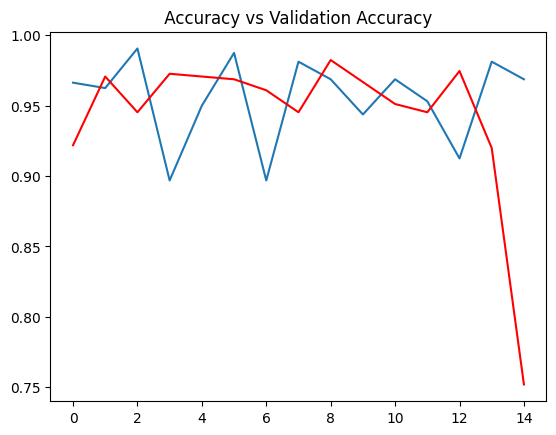

In [39]:
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'], c = "red")

plt.title(" Accuracy vs Validation Accuracy ")
plt.show()

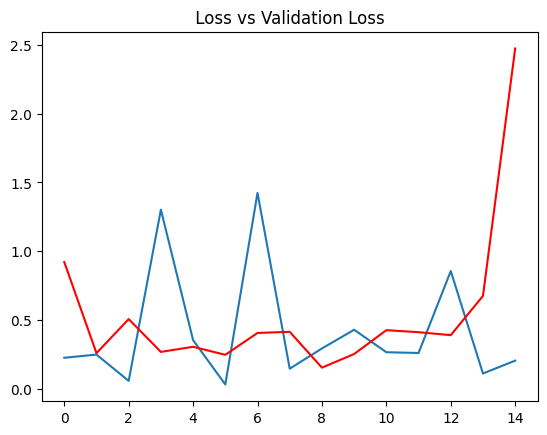

In [40]:
plt.plot(h['loss'])
plt.plot(h['val_loss'], c = "red")

plt.title(" Loss vs Validation Loss ")
plt.show()

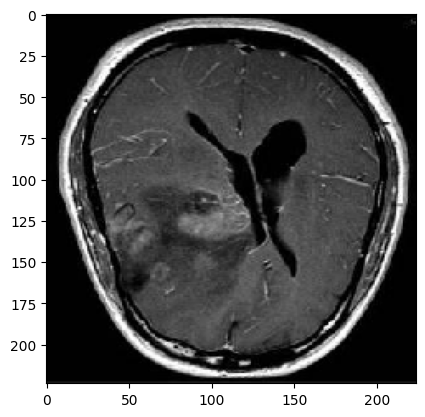

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
6.189434e-11
 The MRI is having a Tumor :-( 


In [42]:
from keras.preprocessing.image import load_img, img_to_array
from keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

path = "/content/Brain Tumor Data Set/Brain Tumor Data Set/Brain Tumor/Cancer (1641).jpg"

img = image.load_img(path, target_size=(224, 224))

i = image.img_to_array(img)/255
input_arr = np.array([i])
input_arr.shape

input_arr = img_to_array(img) / 255.0
plt.imshow(input_arr)
plt.show()

input_arr = np.expand_dims(input_arr, axis=0)
pred = model.predict(input_arr)[0][0]
print(pred)
if pred >= 0.5:
 print(" The MRI is not having a Tumor :-) ")
else:
 print(" The MRI is having a Tumor :-( ")